In [1]:
# 網路爬蟲抓取圖片
import os
import requests
from bs4 import BeautifulSoup
dataurl = 'https://www.google.com.tw/search?ei=bxTMXcuOKZbm-AbTia24Aw&yv=3&q={}&tbm=isch&vet=10ahUKEwiLgtSWtOflAhUWM94KHdNECzcQuT0IXigB.bxTMXcuOKZbm-AbTia24Aw.i&ved=0ahUKEwiLgtSWtOflAhUWM94KHdNECzcQuT0IXigB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'
def getIdolImg(keyword, dstpath):    # (keyword, dstpath) = (搜尋的人名 , 目標路徑)
    for i in range(3):   # 前 3*100 張圖片
        res = requests.get(dataurl.format(keyword, i * 100))
        soup = BeautifulSoup(res.text, 'lxml')   # lxml則是用來解析處理requests取得的數據
        for ele in soup.select('img'):  # 取得所有圖片連結
            imgurl = ele.get('src')
            if imgurl:
                fname = imgurl.split('tbn:')[1]      # 切割檔名
            else:
                imgurl = ele.get('data-src')
            fname  = imgurl.split('tbn:')[1]
            with open(dstpath + fname + '.jpg', 'wb') as f:
                res2 = requests.get(imgurl)
                f.write(res2.content)

In [2]:
if not os.path.exists('EddiePeng'):
    os.mkdir('EddiePeng/')   # 建立目錄夾
getIdolImg('彭于晏', 'EddiePeng/')   # 進行爬蟲

In [3]:
if not os.path.exists('JayChou'):
    os.mkdir('JayChou/')
getIdolImg('周杰倫', 'JayChou/')

In [4]:
if not os.path.exists('Eason'):
    os.mkdir('Eason/')
getIdolImg('陈奕迅', 'Eason/')

In [5]:
# 擷取圖片臉部資訊
import cv2 as cv
from PIL import Image

def extractFace(srcpath, dstpath):   # (srcpath, dstpath) = (圖片資料夾,臉部資料的資料夾)
    if not os.path.exists(srcpath):
        os.mkdir(srcpath)
    if not os.path.exists(dstpath):
        os.mkdir(dstpath)
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')      # 偵測臉部
    face_cascade.load('C:/Users/owner/Anaconda3/pkgs/libopencv-3.4.2-h20b85fd_0/Library/etc/haarcascades/haarcascade_frontalface_default.xml')
    for fname in os.listdir(srcpath):
        img = Image.open(srcpath + fname)   #將檔案開啟
        imgary = cv.imread(srcpath + fname)   #將圖片轉換承數字資料
        faces = face_cascade.detectMultiScale(imgary, 1.3, 5)
        if len(faces) == 1:   # 若只有偵測到一張臉
            x,y,w,h = faces[0]
            crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
            crpim.save(dstpath + fname)   # 儲存到新的路徑之中

In [6]:
srcpath = 'EddiePeng/'   # 圖片資料夾
dstpath = 'EddiePengFace/'   # 臉部資料的資料夾
extractFace(srcpath, dstpath)   # 跑上面程式

In [7]:
srcpath = 'JayChou/' 
dstpath = 'JayChouFace/'
extractFace(srcpath, dstpath)

In [8]:
srcpath = 'Eason/' 
dstpath = 'EasonFace/'
extractFace(srcpath, dstpath)

In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install keras   # keras 是在做類神經網路的高階API

Note: you may need to restart the kernel to use updated packages.


In [22]:
# 建立Convolution Neural Network 模型
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()   # 建立網路架構

# Convolution(卷積)
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

# Max Pooling(最大池化)
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Flattening(平化：打成一維向量)
classifier.add(Flatten()) 

# Fully Connected(全連結)
classifier.add(Dense(units = 128, activation = 'relu'))   # 第一隱藏層 用128個神經元
classifier.add(Dense(units = 128, activation = 'relu'))   # 第二隱藏層 用128個神經元
classifier.add(Dense(units = 3, activation = 'softmax'))   # 分類區分成3類

classifier.compile(optimizer = 'adam',   # 使用adam優化器 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [23]:
# 讀入訓練與測試資料集
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,   # 將圖片做標準化
                                   shear_range = 0.2,  # 固定x或y進行圖片偏移 
                                   zoom_range = 0.2,   # 做些放大縮小的動作 
                                   horizontal_flip = True   # 進行水平翻轉
                                  )

In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
training_set = train_datagen.flow_from_directory(   # 讀入所有訓練數據集的資料
    'training/', target_size = (64, 64),
     batch_size = 10,
     class_mode = 'categorical')

Found 349 images belonging to 3 classes.


In [26]:
test_set = test_datagen.flow_from_directory(   # 讀入所有測試數據集的資料
    'testing/', target_size = (64, 64),
    batch_size = 10, 
    class_mode = 'categorical')

Found 88 images belonging to 3 classes.


In [27]:
# 建立模型
history = classifier.fit_generator(training_set,
                         nb_epoch=30,   # 做30次迭代
                         nb_val_samples=10,   # 每次挑10個當驗證數據集
                         steps_per_epoch = 30,   # 每次循環進行30個步驟
                         verbose = 1,
                         validation_data = test_set)

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=30, verbose=1, validation_data=<keras.pre..., epochs=30, validation_steps=10)`
  import sys


Epoch 1/30
30/30 [==============================] - 6s 196ms/step - loss: 1.1076 - accuracy: 0.3746 - val_loss: 1.0259 - val_accuracy: 0.4286
Epoch 2/30
30/30 [==============================] - 2s 68ms/step - loss: 1.0886 - accuracy: 0.4367 - val_loss: 1.0550 - val_accuracy: 0.3469
Epoch 3/30
30/30 [==============================] - 2s 62ms/step - loss: 1.0795 - accuracy: 0.4195 - val_loss: 0.8622 - val_accuracy: 0.4592
Epoch 4/30
30/30 [==============================] - 2s 63ms/step - loss: 0.9965 - accuracy: 0.5217 - val_loss: 1.2611 - val_accuracy: 0.3673
Epoch 5/30
30/30 [==============================] - 2s 61ms/step - loss: 0.9423 - accuracy: 0.5753 - val_loss: 1.1563 - val_accuracy: 0.5918
Epoch 6/30
30/30 [==============================] - 2s 63ms/step - loss: 0.8860 - accuracy: 0.6267 - val_loss: 0.5959 - val_accuracy: 0.6531
Epoch 7/30
30/30 [==============================] - 2s 64ms/step - loss: 0.8009 - accuracy: 0.6555 - val_loss: 0.4510 - val_accuracy: 0.7653
Epoch 8/30
3

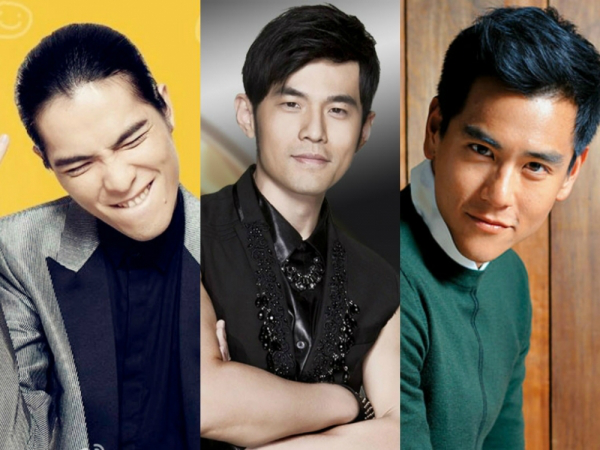

In [86]:
from PIL import Image
im = Image.open('2.jpg')  # 讀入測試檔案
im

In [87]:
from PIL import Image
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')   # 偵測圖片臉部
face_cascade.load('C:/Users/owner/Anaconda3/pkgs/libopencv-3.4.2-h20b85fd_0/Library/etc/haarcascades/haarcascade_frontalface_default.xml')

img = cv.imread('2.jpg')
faces = face_cascade.detectMultiScale(img, 1.2, 3)
faces

array([[419,  98, 161, 161],
       [252,  58, 127, 127]], dtype=int32)

In [88]:
transform_dic = {
    'EddiePengFace' : 'Eddie Peng',
    'JayChouFace'   : 'Jay Chou',
    'EasonFace': 'Eason'
}
name_dic = {v:transform_dic.get(k) for k,v in training_set.class_indices.items()}
name_dic

{0: 'Eason', 1: 'Eddie Peng', 2: 'Jay Chou'}

In [89]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt 
font = cv.FONT_HERSHEY_PLAIN
for x,y,w,h in faces:
    box = (x, y, x+w, y+h)
    crpim = im.crop(box).resize((64,64))
    target_image = image.img_to_array(crpim)
    target_image = np.expand_dims(target_image, axis = 0)
    res = classifier.predict_classes(target_image)[0]
    cv.rectangle(img,(x,y),(x+w,y+h),(14,201,255),2)
    cv.putText(img,name_dic.get(res), (x + int(w/3)-70, y-10), font, 1.8, (14,201,255), 3)

Populating the interactive namespace from numpy and matplotlib


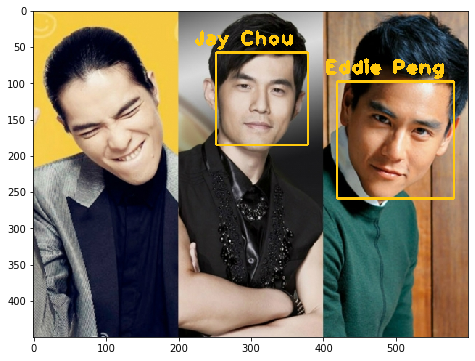

In [90]:
%pylab inline
plt.figure(figsize=(9,6))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [21]:
%reset -f